In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [3]:
data = pd.read_csv("housing.csv")

In [4]:
data.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [24]:
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'rooms_per_household', 'bedrooms_per_room',
       'population_per_household', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [8]:
print(data.describe())

          longitude      latitude  housing_median_age   total_rooms  \
count  20640.000000  20640.000000        20640.000000  20640.000000   
mean    -119.569704     35.631861           28.639486   2635.763081   
std        2.003532      2.135952           12.585558   2181.615252   
min     -124.350000     32.540000            1.000000      2.000000   
25%     -121.800000     33.930000           18.000000   1447.750000   
50%     -118.490000     34.260000           29.000000   2127.000000   
75%     -118.010000     37.710000           37.000000   3148.000000   
max     -114.310000     41.950000           52.000000  39320.000000   

       total_bedrooms    population    households  median_income  \
count    20433.000000  20640.000000  20640.000000   20640.000000   
mean       537.870553   1425.476744    499.539680       3.870671   
std        421.385070   1132.462122    382.329753       1.899822   
min          1.000000      3.000000      1.000000       0.499900   
25%        296.00000

In [9]:
print(data.nunique())

longitude               844
latitude                862
housing_median_age       52
total_rooms            5926
total_bedrooms         1923
population             3888
households             1815
median_income         12928
median_house_value     3842
ocean_proximity           5
dtype: int64


In [11]:
print(data.isnull().sum())

longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64


In [13]:
data['total_bedrooms'].fillna(method='ffill', inplace=True)
print(data.isnull().sum())
print(data.duplicated().sum())

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64
0


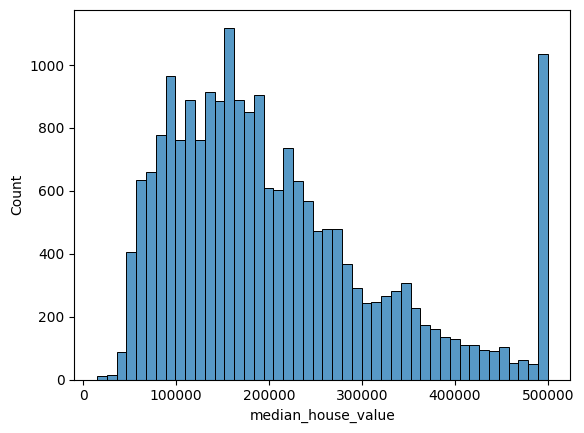

In [26]:
sns.histplot(data['median_house_value'])
plt.show()

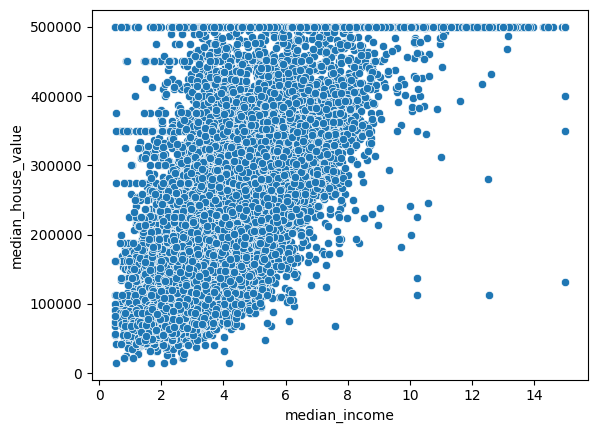

In [27]:
sns.scatterplot(x='median_income', y='median_house_value', data=data)
plt.show()

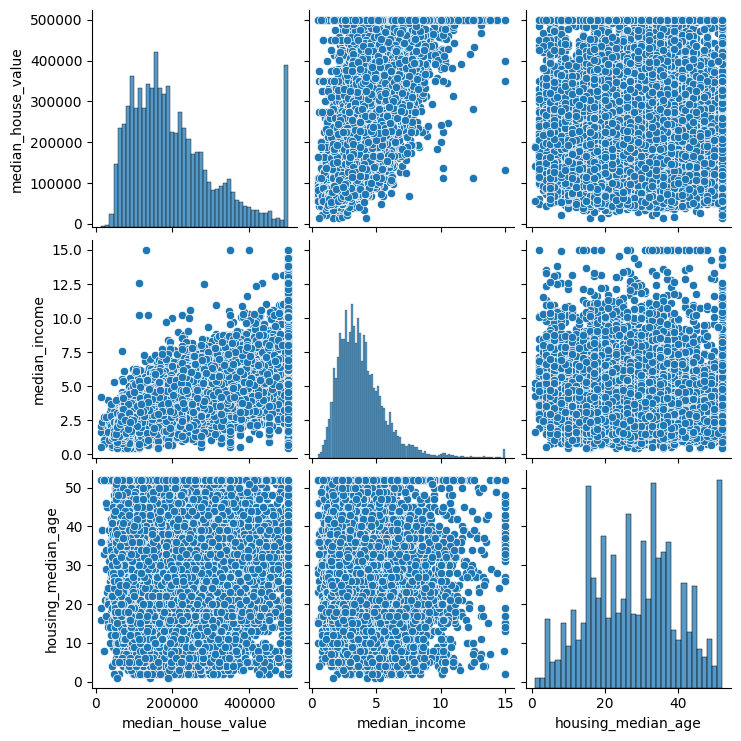

In [28]:
sns.pairplot(data, vars=['median_house_value', 'median_income', 'housing_median_age'])
plt.show()

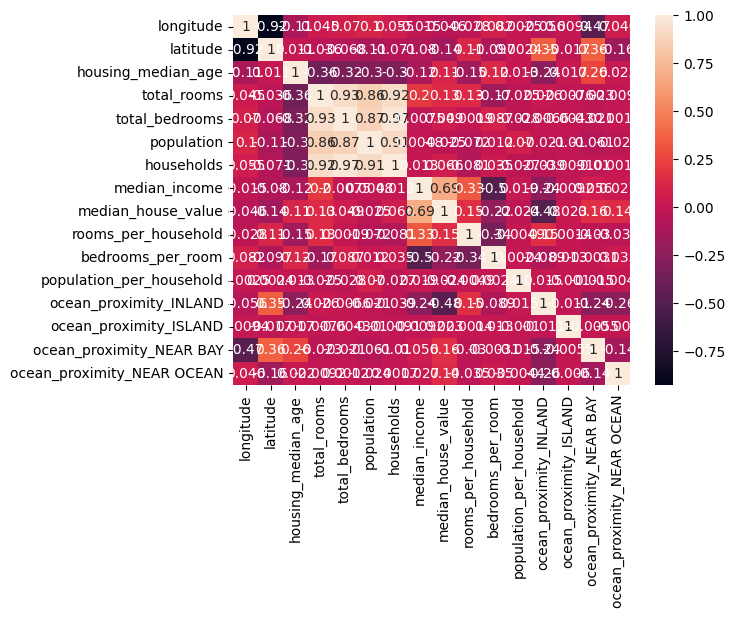

In [29]:
sns.heatmap(data.corr(), annot=True)
plt.show()

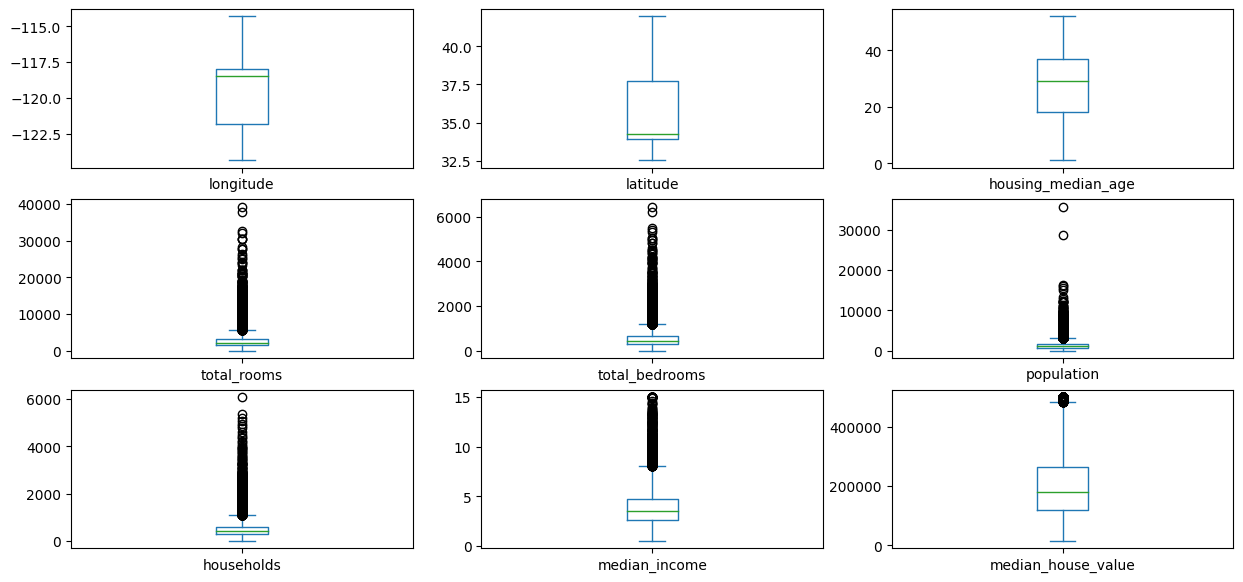

In [15]:
data.plot(kind='box', subplots=True, layout=(3,3), figsize=(15,7))
plt.show()

In [38]:
X = data.drop('median_house_value', axis=1)
y = data['median_house_value']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [39]:
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 51239.66624900712
Mean Squared Error (MSE): 5645578985.800662
Root Mean Squared Error (RMSE): 75137.06798778258
R-squared (R²): 0.5691742746314727


In [41]:
cv_scores = cross_val_score(model, X, y, cv=5)
print("Cross-validation scores:", cv_scores)
print("Average cross-validation score:", cv_scores.mean())

Cross-validation scores: [0.49592942 0.51827256 0.60275875 0.49571531 0.69914358]
Average cross-validation score: 0.5623639218346685


In [44]:

longitude = float(input("Enter longitude: "))
latitude = float(input("Enter latitude: "))
housing_median_age = float(input("Enter housing median age: "))
total_rooms = float(input("Enter total rooms: "))
total_bedrooms = float(input("Enter total bedrooms: "))
population = float(input("Enter population: "))
households = float(input("Enter households: "))
median_income = float(input("Enter median income: "))
ocean_proximity = input("Enter ocean proximity: ")

input_data = pd.DataFrame({
    'longitude': [longitude],
    'latitude': [latitude],
    'housing_median_age': [housing_median_age],
    'total_rooms': [total_rooms],
    'total_bedrooms': [total_bedrooms],
    'population': [population],
    'households': [households],
    'median_income': [median_income],
    'ocean_proximity': [ocean_proximity]
})

input_data = pd.get_dummies(input_data, columns=['ocean_proximity'])

missing_cols = set(X_train.columns) - set(input_data.columns)
for col in missing_cols:
    input_data[col] = 0
input_data = input_data[X_train.columns]


predicted_value = model.predict(input_data)

print("Predicted Median House Value:", predicted_value[0])


Enter longitude: 55
Enter latitude: 44
Enter housing median age: 30
Enter total rooms: 44
Enter total bedrooms: 33
Enter population: 4505
Enter households: 554
Enter median income: 40000
Enter ocean proximity: NEAR bay
Predicted Median House Value: 1652177043.344114
